# Demographic Data Analysis - Notebook

#### Let's use pandas for our analysis.

In [1]:
import pandas as pd

---

### We have to import our dataframe, reading from the csv.

In [2]:
df = pd.read_csv('adult_data.csv')

---

### Let's have a look at our data!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---

### Doing analysis

#### How many people of each race are represented in this dataset?

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


<Axes: xlabel='race'>

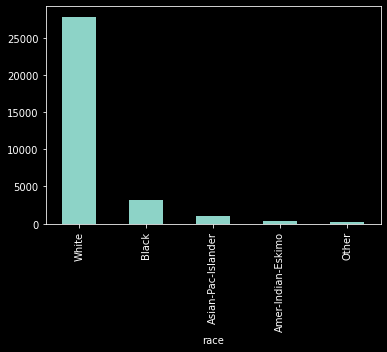

In [5]:
race_count = df['race'].value_counts()

print(race_count)

race_count.plot(kind='bar')

#### What is the average age of men?

In [6]:
df[df["sex"] == "Male"]["age"].mean().round(1)

39.4

#### What is the percentage of people who have a Bachelors degree?

In [7]:
bachelors_count = df["education"].value_counts()["Bachelors"]

(bachelors_count / len(df.index) * 100).round(1)

16.4

#### What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [8]:
higher_education_mask = df["education"].isin(["Bachelors", "Masters", "Doctorate"])

higher_education = df[higher_education_mask]

higher_education_rich_count = higher_education[higher_education["salary"] == ">50K"].shape[0]

round(higher_education_rich_count / higher_education.shape[0] * 100, 1)

46.5

#### What percentage of people without advanced education make more than 50K?

In [9]:
lower_education = df[~higher_education_mask]

lower_education_rich_count = lower_education[lower_education["salary"] == ">50K"].shape[0]

round(lower_education_rich_count / lower_education.shape[0] * 100, 1)

17.4

#### What is the minimum number of hours a person works per week?

In [10]:
min_work_hours = df["hours-per-week"].min()
min_work_hours

1

#### What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [11]:
min_hour_workers = df[df["hours-per-week"] == min_work_hours]
min_hour_workers_rich = min_hour_workers[min_hour_workers["salary"] == ">50K"]

min_hour_workers.shape[0] / min_hour_workers_rich.shape[0]

10.0

#### What country has the highest percentage of people that earn >50K and what is that percentage?

In [40]:
highest_earners = df[df["salary"] == ">50K"]
highest_earners_by_country = highest_earners["native-country"].value_counts().to_frame()

highest_earning_country = highest_earners_by_country.iloc[0]
highest_earning_country_percentage = highest_earning_country.iloc[0] / highest_earners.shape[0] * 100

highest_earning_country

count    7171
Name: United-States, dtype: int64